In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [31]:
df = pd.read_csv("featurextacted.csv")

In [32]:
df.head()

,Unnamed: 0,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,0,North Korea to rejoin six-nation talks,0,38.0,5.500000,0.166667,1.0,6.0,1.0,0.0,0.0,0.000000,0.000000
1,1,Watch This Out Gay Marine Ask Singer Steve Gra...,1,73.0,4.285714,0.285714,1.0,14.0,2.0,0.0,0.0,0.458333,0.791667
2,2,Protester says Japanese whalers shot him,0,40.0,5.833333,0.166667,1.0,6.0,4.0,0.0,0.0,0.000000,0.000000
3,3,At least twelve die in Mogadishu attacks,0,40.0,4.857143,0.571429,2.0,7.0,4.0,0.0,0.0,-0.300000,0.400000
4,4,Can Strangers Match Couples,1,27.0,6.000000,0.250000,2.0,4.0,6.0,0.0,0.0,0.000000,0.000000


In [33]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [34]:
df.head()

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,North Korea to rejoin six-nation talks,0,38.0,5.500000,0.166667,1.0,6.0,1.0,0.0,0.0,0.000000,0.000000
1,Watch This Out Gay Marine Ask Singer Steve Gra...,1,73.0,4.285714,0.285714,1.0,14.0,2.0,0.0,0.0,0.458333,0.791667
2,Protester says Japanese whalers shot him,0,40.0,5.833333,0.166667,1.0,6.0,4.0,0.0,0.0,0.000000,0.000000
3,At least twelve die in Mogadishu attacks,0,40.0,4.857143,0.571429,2.0,7.0,4.0,0.0,0.0,-0.300000,0.400000
4,Can Strangers Match Couples,1,27.0,6.000000,0.250000,2.0,4.0,6.0,0.0,0.0,0.000000,0.000000


In [35]:
#Splitting the Data into Train and Test with 0.25 as test sets
X_train,X_test,y_train,y_test=train_test_split(df.Clickbaits,df.bait,test_size=0.20,random_state=0)

In [36]:
#Using the Tfid Vectorizer because the size of the dataset is Large
vectorizer = TfidfVectorizer()
tfidf_train_x = vectorizer.fit_transform(X_train)

In [37]:
#Now using the Logistic Regression Algorithm
classifier = LogisticRegression(penalty="l2")
classifier.fit(tfidf_train_x, y_train)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#After transform the test data will be stored as a float in case of TFID
tfidf_test_x = vectorizer.transform(X_test)
print(tfidf_test_x.shape)
tfidf_test_x

(6400, 20618)


<6400x20618 sparse matrix of type '<class 'numpy.float64'>'
	with 54569 stored elements in Compressed Sparse Row format>

In [39]:
predicted = classifier.predict(tfidf_test_x)

In [40]:
#Finding the Accuracy Score for the Algorithm
accuracy = cross_val_score(classifier, tfidf_test_x, y_test, cv=5)
acc = accuracy.mean()
print(acc * 100)

94.81249999999999


/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predicted)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,predicted)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix1 = confusion_matrix(y_test,predicted)
print(matrix1)

Accuracy: 0.969219
Precision: 0.982222
Recall: 0.956414
F1 score: 0.969146
ROC AUC: 0.969360
[[3109   56]
 [ 141 3094]]


In [42]:
#Enter anything to check its validity
print("Enter the sentence or phrase you want to validate: \n\n")
inpPhrase = [input()]
output = classifier.predict(vectorizer.transform(inpPhrase))
print("---------------------------------------------------------")
if output == 1:
    print("CLICKBAIT")
else:
    print("NOT a CLICKBAIT")
print("---------------------------------------------------------")

Enter the sentence or phrase you want to validate: 



---------------------------------------------------------
NOT a CLICKBAIT
---------------------------------------------------------


In [43]:
# save the model to disk
filename = 'finalVECTORmodel.sav'
pickle.dump(classifier, open(filename, 'wb'))

# some time later...
inpPhrase = [input()]
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
output = loaded_model.predict(vectorizer.transform(inpPhrase))
# predicted = loaded_model.predict(tfidf_test_x)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
# accuracy = accuracy_score(y_test,result)
# accuracy
output[0]

0

In [44]:
predicted[0]

0

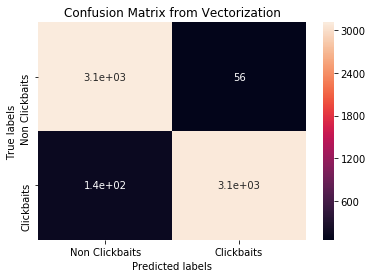

In [45]:
import seaborn as sns

ax= plt.subplot()
fig = sns.heatmap(matrix1, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix from Vectorization'); 
ax.xaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
ax.yaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
fig = fig.get_figure()
fig.savefig("ConfMatrix1.png")

In [46]:
df.head(10)

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,North Korea to rejoin six-nation talks,0,38.0,5.500000,0.166667,1.0,6.0,1.0,0.0,0.0,0.000000,0.000000
1,Watch This Out Gay Marine Ask Singer Steve Gra...,1,73.0,4.285714,0.285714,1.0,14.0,2.0,0.0,0.0,0.458333,0.791667
2,Protester says Japanese whalers shot him,0,40.0,5.833333,0.166667,1.0,6.0,4.0,0.0,0.0,0.000000,0.000000
3,At least twelve die in Mogadishu attacks,0,40.0,4.857143,0.571429,2.0,7.0,4.0,0.0,0.0,-0.300000,0.400000
4,Can Strangers Match Couples,1,27.0,6.000000,0.250000,2.0,4.0,6.0,0.0,0.0,0.000000,0.000000
5,You Probably Qualify To Be An Astronaut And Do...,1,62.0,4.250000,0.583333,2.0,12.0,8.0,2.0,1.0,0.000000,0.000000
6,15 Questions The World Has For Black Friday,1,43.0,4.500000,0.375000,3.0,8.0,8.0,3.0,1.0,-0.166667,0.433333
7,Nigerian ex-governor James Ibori arrested in D...,0,50.0,6.285714,0.142857,3.0,7.0,9.0,3.0,1.0,0.000000,0.000000
8,"If ""Harry Potter"" Characters Were In ""Game Of ...",1,54.0,5.111111,0.444444,3.0,9.0,9.0,4.0,1.0,-0.400000,0.400000
9,This Woman's Insanely Magical Instagram Will M...,1,74.0,5.250000,0.416667,3.0,12.0,12.0,4.0,1.0,0.400000,0.550000


## Training Data

In [47]:
X = df.drop(["Clickbaits","bait"],axis=1)
y = df.bait

In [48]:
#Splitting the Data into Train and Test with 0.25 as test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [49]:
logmodel = LogisticRegression(penalty="l2")

In [50]:
logmodel.fit(X_train,y_train)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predicted = logmodel.predict(X_test)

In [52]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.79      0.79      0.79      3165\n           1       0.80      0.79      0.79      3235\n\n    accuracy                           0.79      6400\n   macro avg       0.79      0.79      0.79      6400\nweighted avg       0.79      0.79      0.79      6400\n'

In [53]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predicted)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,predicted)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix2 = confusion_matrix(y_test,predicted)
print(matrix2)

Accuracy: 0.792813
Precision: 0.795969
Recall: 0.793509
F1 score: 0.794737
ROC AUC: 0.792805
[[2507  658]
 [ 668 2567]]


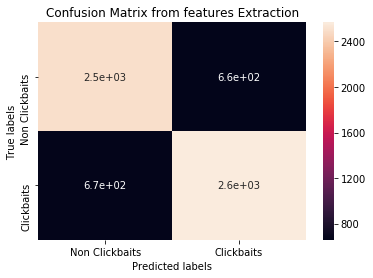

In [54]:
import seaborn as sns

ax= plt.subplot()
fig = sns.heatmap(matrix2, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix from features Extraction'); 
ax.xaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
ax.yaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
fig = fig.get_figure()
fig.savefig("ConfMatrix2.png")

In [55]:
accuracy_score(y_test,predicted)

0.7928125

In [56]:
# save the model to disk
filename = 'finalFEATUREmodel.sav'
pickle.dump(logmodel, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
print(result)

0.7928125


In [57]:
X_test.head()

,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
31330,53.0,5.000000,0.111111,12091.0,9.0,37966.0,10381.0,3577.0,0.000000,0.000000
3514,61.0,3.428571,0.642857,1388.0,14.0,4293.0,1159.0,408.0,0.100000,0.300000
12363,77.0,4.200000,0.600000,4786.0,15.0,15021.0,4089.0,1366.0,-0.433333,0.416667
25927,79.0,5.666667,0.250000,10002.0,12.0,31325.0,8624.0,2922.0,0.333333,0.766667
31886,66.0,4.583333,0.416667,12308.0,12.0,38653.0,10583.0,3650.0,0.000000,0.700000


In [58]:
df["Clickbaits"][9]

"This Woman's Insanely Magical Instagram Will Make You Smile Every Damn Day"